In [126]:
# Given a set of tweets from a hashtag or a user, plot the cloud of its embeddings.
# An embedding of a tweet is a probability over latent topics.
import scipy
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import condor
from condor.config import PATHS
from condor.utils.utils_json import load_jsonl
import pprint

import matplotlib.pyplot as plt
%matplotlib inline 

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [134]:
keyword="hola"
filename = PATHS['tracked'] + keyword + ".jsonl"
data = load_jsonl(filename)
print(f"{len(data)} tweets in file")
tweets = [d['text'] for d in data[0:100]]

Loaded 202 records from /Users/a.lumbreras/OneDrive - CRITEO/Code/twitter-followers-graph/condor/data/fetched/tracked/hola.jsonl
202 tweets in file


In [143]:
n_features = 100
tf_vectorizer = CountVectorizer(max_df=0.95, 
                                min_df=0,
                                max_features=n_features,
                                stop_words=None)                         
tf = tf_vectorizer.fit_transform(tweets)
lda = LatentDirichletAllocation(n_components=3, max_iter=5,
                            learning_method='online',
                            learning_offset=50.,
                            random_state=0)
lda.fit(tf)

print("Tweet embbeddings:")
tweet_embeddings = lda.transform(tf)
print(tweet_embeddings)

print("\nWord embeddings:")
# Show topic distribution over words
# https://stackoverflow.com/questions/44208501/getting-topic-word-distribution-from-lda-in-scikit-learn
topic_embeddings = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
word_embeddings = topic_embeddings.T
print(word_embeddings)

Tweet embbeddings:
[[0.01522894 0.96837942 0.01639164]
 [0.06956835 0.0737772  0.85665445]
 [0.16993636 0.17177255 0.65829109]
 [0.04455997 0.04468778 0.91075225]
 [0.05389866 0.05677902 0.88932232]
 [0.0394557  0.04073571 0.91980859]
 [0.16993636 0.17177255 0.65829109]
 [0.01522894 0.96837942 0.01639164]
 [0.06900404 0.06060225 0.87039371]
 [0.16993636 0.17177255 0.65829109]
 [0.16993636 0.17177255 0.65829109]
 [0.0212848  0.02198136 0.95673384]
 [0.05671353 0.05783442 0.88545204]
 [0.01726387 0.01657346 0.96616267]
 [0.05793434 0.05791781 0.88414785]
 [0.0457797  0.04502714 0.90919316]
 [0.7564597  0.11724362 0.12629668]
 [0.12367367 0.11825734 0.75806899]
 [0.01463397 0.9688369  0.01652913]
 [0.088899   0.0477515  0.8633495 ]
 [0.03049662 0.03474652 0.93475686]
 [0.0259996  0.02740242 0.94659798]
 [0.11701344 0.11901445 0.76397211]
 [0.08504665 0.08608118 0.82887218]
 [0.16993636 0.17177255 0.65829109]
 [0.07300127 0.07080801 0.85619072]
 [0.01726387 0.01657346 0.96616267]
 [0.05119

In [153]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_words = tsne.fit_transform(word_embeddings)
tsne_tweets = tsne.fit_transform(tweet_embeddings)
df_words = pd.DataFrame()
df_words['tsne-one'] = tsne_words[:,0]
df_words['tsne-two'] = tsne_words[:,1]

df_tweets = pd.DataFrame()
df_tweets['tsne-one'] = tsne_tweets[:,0]
df_tweets['tsne-two'] = tsne_tweets[:,1]

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

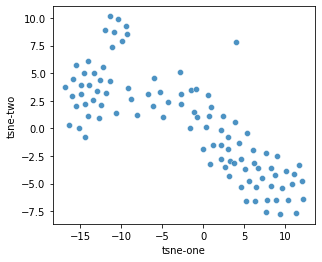

In [154]:
plt.figure(figsize=(16,4))
ax = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_tweets,
    legend="full",
    alpha=0.8,
    ax=ax
)

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

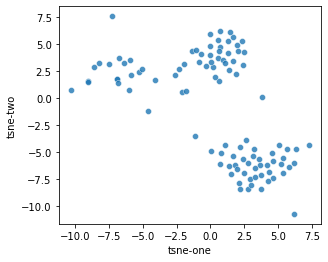

In [155]:
plt.figure(figsize=(16,4))
ax = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_words,
    legend="full",
    alpha=0.8,
    ax=ax
)